# Homework 5

**Due: 10/22/2020 on gradescope**

## References

+ Lectures 13-16 (inclusive).


## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.

+ The total homework points are 100. Please note that the problems are not weighed equally.

**Note**: Please match all the pages corresponding to each of the questions when you submit on gradescope. 

## Student details

+ **First Name:**
+ **Last Name:**
+ **Email:**

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set_context('paper')
sns.set_style('white')
import scipy.stats as st
# A helper function for downloading files
import requests
import os
def download(url, local_filename=None):
    """
    Downloads the file in the ``url`` and saves it in the current working directory.
    """
    data = requests.get(url)
    if local_filename is None:
        local_filename = os.path.basename(url)
    with open(local_filename, 'wb') as fd:
        fd.write(data.content)

# Problem 1 - Estimating the mechanical properties of a plastic material from molecular dynamics simulations

First, make sure that [this](https://raw.githubusercontent.com/PredictiveScienceLab/data-analytics-se/master/homework/stress_strain.txt) dataset is visible from this Jupyter notebook.
You may achieve this by either:

+ Downloading the data file, putting it in your Google drive, mounting the drive, and changing to the directory of the file (see Problem 0 in [Homework](https://colab.research.google.com/github/PredictiveScienceLab/data-analytics-se/blob/master/homework/homework_03.ipynb); or
+ Downloading the file to the working directory of this notebook with this code:

In [ ]:
url = 'https://raw.githubusercontent.com/PredictiveScienceLab/data-analytics-se/master/homework/stress_strain.txt'
download(url)

It's up to you what you choose to do.
If the file is in the right place, the following code should work:

In [7]:
data =  np.loadtxt('stress_strain.txt')

The dataset was generated using a molecular dynamics simulation of a plastic material (thanks to [Professor Alejandro Strachan](https://engineering.purdue.edu/MSE/people/ptProfile?id=33239) for sharing the data!).
Specifically, Strachan's group did the following:
- They took a rectangular chunk of the material and marked the position of each one of its atoms;
- They started applying a tensile force along one dimension.
The atoms are coupled together through electromagnetic forces and they must all satisfy Newton's law of motion.
- For each value of the applied tensile force they marked the stress (force be unit area) in the middle of the materail and the corresponding strain of the material (percent enlogation in the pulling direction).
- Eventually the material entered the plastic regime and then it broke.
Here is a visualization of the data:

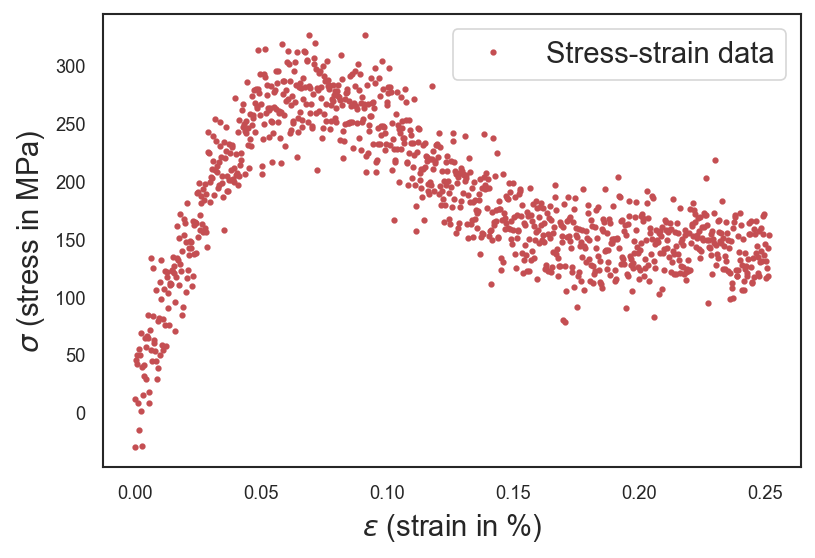

In [11]:
x = data[:, 0] # Strain 
y = data[:, 1] # Stress in MPa
plt.figure(dpi=150)
plt.plot(x, y, 'ro', markersize=2, label = 'Stress-strain data')
plt.xlabel('$\epsilon$ (strain in %)', fontsize=14)
plt.ylabel('$\sigma$ (stress in MPa)', fontsize=14)
plt.legend(loc='best', fontsize = 14);

Note that for each particular value of the strain, you don't necessarily get a unique stress.
This is because in molecular dynamics the atoms are jiggling around due to thermal effects.
So there is always this "jiggling" noise when you are trying to measure the stress and the strain.
We would like to process this noise in order to extract what is known as the [stress-strain curve](https://en.wikipedia.org/wiki/Stress–strain_curve) of the material.
The stress-strain curve is a macroscopic property of the the material which is affeted by the fine structure, e.g., the chemical bonds, the crystaline structure, any defects, etc.
It is a required input to mechanics of materials.

## Part A - Fitting the stress-strain curve in the elastic regime
The very first part of the stress-strain curve should be linear.
It is called the *elastic regime*.
In that region, say $\epsilon < \epsilon_l=0.04$, the relationship between stress and strain is:
$$
\sigma(\epsilon) = E\epsilon.
$$
The constant $E$ is known as the *Young modulus* of the material.
Assume that you measure $\epsilon$ without any noise, but your measured $\sigma$ is noisy.

### Subpart A.I
First, extract the relevant data for this problem, split it into training and validation datasets, and visualize the training and validation datasets using different colors.

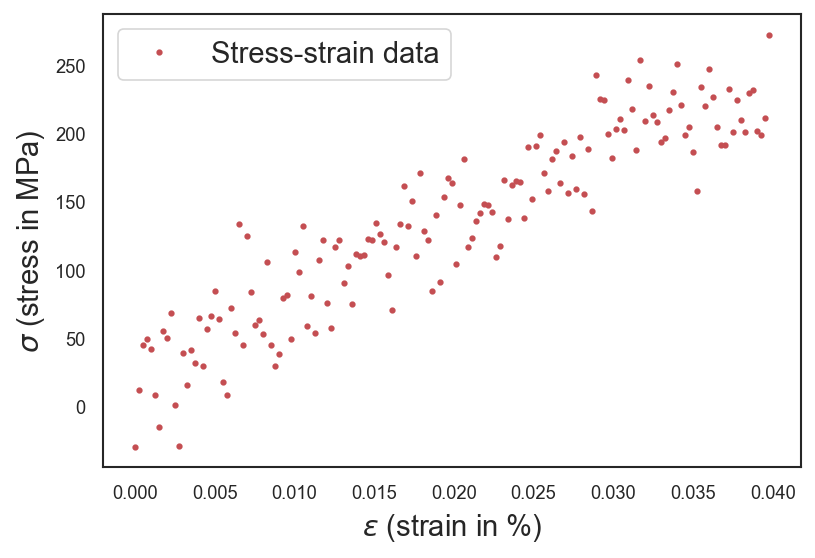

In [12]:
# The point at which the stress-strain curve stops being linear
epsilon_l = 0.04
# Relevant data (this is nice way to get the linear part of the stresses and straints)
x_rel = x[x < 0.04]
y_rel = y[x < 0.04]
# Visualize to make sure you have the right data
plt.figure(dpi=150)
plt.plot(x_rel, y_rel, 'ro', markersize=2, label = 'Stress-strain data')
plt.xlabel('$\epsilon$ (strain in %)', fontsize=14)
plt.ylabel('$\sigma$ (stress in MPa)', fontsize=14)
plt.legend(loc='best', fontsize = 14);

In [15]:
# Split the data into training and validation datasets
# Hint: Consult the hands-on activities of the lectures
x_train = # Your code
y_train = # Your code
x_valid = # Your code
y_valid = # Your code
# Your code to plot the two datasets here

SyntaxError: invalid syntax (<ipython-input-15-c1f14b1df615>, line 3)

### Subpart A.II
Perform Bayesian linear regression with the evidence approximation to estimate the noise variance and the hyperparameters of the prior.

In [13]:
# your code here

### Subpart A.III
Visualize your epistemic and the aleatory uncertainty about the stress-strain curve in the elastic regime.

In [ ]:
# your code here

### Subpart A. IV
Visualize the posterior of the Young modulus E conditioned on the data.

In [14]:
# your code here

### Subpart A.V
Take five samples of stress-strain curve in the elastic regime and visualize them.

In [ ]:
# your code here

### Subpart A.VI
Calculate the mean square error of the validation data.

In [16]:
# your code here

### Subpart A.VII
Make the observations vs predictions plot for the validation data.

In [17]:
# your code here

### Subpart A.VIII
Compute and plot the standarized erros for the validation data.

In [18]:
# your code here

### Subpart A.IX
Make the quantile-quantile plot of the standarized errors.

In [ ]:
# your code here

### Subpart A.X

Find the 95% credible interval for the Young modulus $E$.

### Subpart A.XI
If you had to pick a single value for the Young modulus $E$, what would it be and why?

In [ ]:
# your code here

*Your answer here*

## Part B - Estimate the yield stress

The pick of the stress-strain curve is known as the yield stress.
We will like to estimate it.

### Subpart B.I - Model the entire stress-strain relationship.
To do this, we will set up a generalized linear model that can capture the entire stress-strain relationship.
Remember, you can use any model you want as soon as:
+ it is linear in the parameters to be estimated,
+ it clearly has a well-defined elastic regime (see Part A).

Describe your model clearly, justify why it is good, and visualize the epistemic and aleatory uncertainty for the entire stress-train curve.

**Hints:**

- You can use the [Heavide step function](https://en.wikipedia.org/wiki/Heaviside_step_function) to turn on or off models for various ranges of $\epsilon$. The idea is quite simple. Here is a model that has the right form in the elastic regime and an arbitrary form in the non-linear regime:
$$
f(\epsilon;E,\mathbf{w}_g) = E\epsilon \left[(1 - H(\epsilon - \epsilon_l)\right] + g(\epsilon;\mathbf{w}_g)H(\epsilon - \epsilon_l),
$$
where
$$
H(x) = \begin{cases}
0,\;\text{if}\;x < 0\\
1,\;\text{otherwise},
\end{cases}
$$
and $g$ is any function linear in the parameters $\mathbf{w}_g$, e.g., a polynomial in $\epsilon$.

- Do not just pick any model. Justify why the model is a good choice by going through many of the steps you went through in part A of this problem, e.g., split the dataset in training and validation, do the mean square error, the observation vs predictions plots, standarized errors, etc.

- You would have to write a function that computes the design matrix for your model. We have given you the skeleton for this.

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br><br><br><br><br><br><br><br><br><br>

In [ ]:
# Complete this code to make your model:
def compute_design_matrix(X):
    """
    Computes the design matrix for the stress-strain curve problem.
    
    Arguments:
        X     -     A 2D array. First dimension is the number of inputs N.
                    Second dimension is not checked.
    
    Returns:
        A design matrix N x M, where M is the number of basis functions you want
        to use.
    """
    # Sanity check
    assert isinstance(X, np.ndarray)
    assert X.ndim == 2, 'Pass the array as X[:, None] if it is one dimensional'
    n = X.shape[0]
    # The number of basis functions
    m = # Your choice
    # The design matrix:
    Phi = np.ndarray((n, m))
    # Loop over the input points
    for i in range(n):
        # Loop over the basis functions
        for j in range(m):
            # Your code here to compute your j-th basis function
            # evaluated at X[i]
            # You may of course use more than one line
            Phi[i, j] = # Your code here. Use the vector X[i].
    return Phi

# Your code here - Repeat as many text and code blocks as you like

### Subpart B.II - Extract the yield stress

Now, you are going to quantify your epistemic uncertainty about the yield stress.
The yield stress is the maximum of the stress-strain relationship.
Since you have epistemic uncertainty about the stress-strain relationship, you also have epistemic uncertainty about the yield stress.

Do the following:
- Visualize posterior of the yield stress.
- Find a 95% credible interval for the yield stress.
- Pick a value for the yield stress.

**Hint:**
To characterize your epistemic uncertainty about the yield stress, you would have to do the following:
- Define a dense set of strain points between 0 and 0.25.
- Repeatedly:
    + sample from the posterior of the weights of your model
    + for each sample evaluate the stresses at the dense set of strain points defined earlier
    + for each sampled stress vector, find the maximum. This is a sample of the yield stress.

In [19]:
# your code here - Repeat as many text and code blocks as you like

## Part C - Improving your model

The model you constructed in part B may have a disctontinuity at $\epsilon=\epsilon_l$.
How can you enforce continuity of $\sigma(\epsilon)$ and its first derivative at that point?
Can you reparameterize the model of part B, so that this condition is automatically satisfied?
If yes, then repeat the analysis of part B.

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br><br><br><br><br><br><br><br><br><br>

In [25]:
# Enter your code here

# Problem 2 - Optimizing the performance of a compressor

In this problem we are going to need [this_ADD_LINK](ADD_LINK) dataset.
As before, you can either put it on your Google drive or just download it with the code segment below:

In [135]:
url = 'https://raw.githubusercontent.com/PredictiveScienceLab/data-analytics-se/master/homework/compressor_data.xlsx'
download(url)

Note that this is an Excell file, so we are going to need pandas to read it.
Here is how:

In [82]:
import pandas as pd
data = pd.read_excel('compressor_data.xlsx')
data

,T_e,DT_sh,T_c,DT_sc,T_amb,f,m_dot,m_dot.1,Capacity,Power,Current,COP,Efficiency
0,-30,11,25,8,35,60,28.8,8.000000,1557,901,4.4,1.73,0.467
1,-30,11,30,8,35,60,23.0,6.388889,1201,881,4.0,1.36,0.425
2,-30,11,35,8,35,60,17.9,4.972222,892,858,3.7,1.04,0.382
3,-25,11,25,8,35,60,46.4,12.888889,2509,1125,5.3,2.23,0.548
4,-25,11,30,8,35,60,40.2,11.166667,2098,1122,5.1,1.87,0.519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,10,11,45,8,35,60,245.2,68.111111,12057,2525,11.3,4.78,0.722
61,10,11,50,8,35,60,234.1,65.027778,10939,2740,12.3,3.99,0.719
62,10,11,55,8,35,60,222.2,61.722222,9819,2929,13.1,3.35,0.709
63,10,11,60,8,35,60,209.3,58.138889,8697,3091,13.7,2.81,0.693


The data are part of a an experimental study of a variable speed reciprocating compressor.
The experimentalists varied two temperatures $T_e$ and $T_c$ (both in C) and they measured various other quantities.
Our goal is to learn the map between $T_e$ and $T_c$ and measured Capacity and Power (both in W).
First, let's see how you can extract only the relevant data.

In [131]:
# Here is how to extract the T_e and T_c columns and put them in a single numpy array
x = data[['T_e','T_c']].values
x

array([[-30,  25],
       [-30,  30],
       [-30,  35],
       [-25,  25],
       [-25,  30],
       [-25,  35],
       [-25,  40],
       [-25,  45],
       [-20,  25],
       [-20,  30],
       [-20,  35],
       [-20,  40],
       [-20,  45],
       [-20,  50],
       [-15,  25],
       [-15,  30],
       [-15,  35],
       [-15,  40],
       [-15,  45],
       [-15,  50],
       [-15,  55],
       [-10,  25],
       [-10,  30],
       [-10,  35],
       [-10,  40],
       [-10,  45],
       [-10,  50],
       [-10,  55],
       [-10,  60],
       [ -5,  25],
       [ -5,  30],
       [ -5,  35],
       [ -5,  40],
       [ -5,  45],
       [ -5,  50],
       [ -5,  55],
       [ -5,  60],
       [ -5,  65],
       [  0,  25],
       [  0,  30],
       [  0,  35],
       [  0,  40],
       [  0,  45],
       [  0,  50],
       [  0,  55],
       [  0,  60],
       [  0,  65],
       [  5,  25],
       [  5,  30],
       [  5,  35],
       [  5,  40],
       [  5,  45],
       [  5,

In [132]:
# Here is how to extract the Capacity
y = data['Capacity'].values
y

array([ 1557,  1201,   892,  2509,  2098,  1726,  1398,  1112,  3684,
        3206,  2762,  2354,  1981,  1647,  5100,  4547,  4019,  3520,
        3050,  2612,  2206,  6777,  6137,  5516,  4915,  4338,  3784,
        3256,  2755,  8734,  7996,  7271,  6559,  5863,  5184,  4524,
        3883,  3264, 10989, 10144,  9304,  8471,  7646,  6831,  6027,
        5237,  4461, 13562, 12599, 11633, 10668,  9704,  8743,  7786,
        6835,  5891, 16472, 15380, 14279, 13171, 12057, 10939,  9819,
        8697,  7575])

Fit the following multivariate polynomial model to **both the Capacity and the Power**:
$$
y = w_1 + w_2T_e + w_3 T_c + w_4 T_eT_c + w_5 T_e^2 + w_6T_c^2 + w_7 T_e^2T_c + w_8T_eT_c^2 + w_9 T_e^3 + w_{10}T_c^3 + \epsilon,
$$
where $\epsilon$ is a Gaussian noise term with unknown variance.
**Hints:**
+ You may use [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to construct the design matrix of your polynomial features. Do not program the design matrix by hand.
+ You should split your data into training and validation and use various validation metrics to make sure that your models make sense.
+ Use [ARD Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ARDRegression.html#sklearn.linear_model.ARDRegression) to fit any hyperparameters and the noise.

## Part A - Fitting the Capacity

In [111]:
# your code here - Repeat as many text and code blocks as you like

### Subpart A.I

What is the noise variance you estimated for the Capacity?

In [133]:
# your code here

### Subpart A.II
Which features of the temperatures (basis functions of your model) are the most important for predicting the Capacity?

In [ ]:
# your code here

## Part B - Fitting the Power

In [ ]:
# your code here - Repeat as many text and code blocks as you like

### Subpart B.I

What is the noise variance you estimated for the Power?

In [134]:
# your code here

### Subpart B.II
Which features of the temperatures (basis functions of your model) are the most important for predicting the Power?

# Problem 3 - Explaining the challenger disaster
On January 28, 1986, the [Space Shuttle Challenger](https://en.wikipedia.org/wiki/Space_Shuttle_Challenger_disaster) disintegrated after 73 seconds from lunch.
The failure can be traced on the rubber O-rings which were used to seal the joints of the solid rocket boosters (required to force the hot, high-pressure gases generated by the burning solid propelant through the nozzles thus producing thrust).
It turns out that the material was particularly sensitive on the external temperature.